# Heart Attack Dataset

This dataset was downloaded from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.<br>
The notebook was created taking as baseline the explanations from the "Building Your First PyTorch Solution" course in pluralsight.com.

In [1]:
# Import required libraries
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./dataset/heart.csv')

## Data Description

*age*: Age of the person<br>
*sex*: Gender of the person<br>
*cp*: chest pain type<br>
*trtbps*: resting blood pressure (mmHg)<br>
*chol*: cholesterol (mg/dL)<br>
*fbs*: fasting blood sugar > 120 mg/dL<br>
*restecg*: resting electrocardiographic results<br>
*thalachh*: maximum heart rate achieved<br>
*exng*: exercise induced angina (1 = yes, 0 = no)<br>
*oldpeak*: previous peak<br>
*slp*: slope<br>
*caa*: number of major vessels (0-3)<br>
*thall*: Thal rate<br>
*output*: had heart attack (target)<br>


In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check data

In [4]:
# Check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


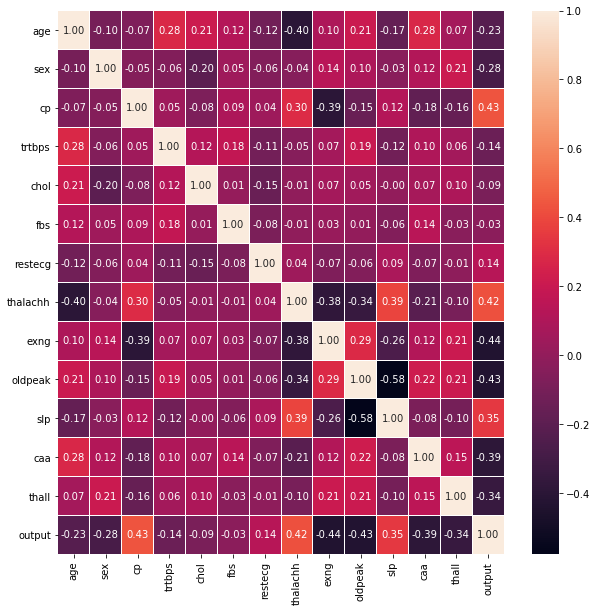

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

Cholesterol and fasting blood sugar > 120mg/dL seem to have the least relationship with the incidence of heart attacks.
Higher correlated variables include maximum heart rate achieved, number of major vessels and previous peak.

Start predictions without Cholesterol and fasting blood sugar > 120mg/dL.

## Start training

#### Setting features and label

In [7]:
features = data[['age', 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
features.head()

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [8]:
target = data[['output']]
target.head()

,output
0,1
1,1
2,1
3,1
4,1


#### Split data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

#### Convert data into pytorch tensors

In [10]:
X_train_tensor = torch.from_numpy(X_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()
X_train_tensor.shape, X_test_tensor.shape

(torch.Size([227, 11]), torch.Size([76, 11]))

In [11]:
# Use view to reshape the tensor
y_train_tensor = torch.from_numpy(y_train.values).view(1,-1)[0].long()
y_test_tensor = torch.from_numpy(y_test.values).view(1,-1)[0].long()
y_train_tensor.shape,y_test_tensor.shape

(torch.Size([227]), torch.Size([76]))

#### Start setting up neural net

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

input_size = X_train_tensor.shape[1]
output_size = len(target['output'].unique())

In [13]:
input_size, output_size

(11, 2)

In [14]:
# Define a neural net class to create the model

class Net(nn.Module):
    
    ''' Creates neural network model.
        Required inputs include the number of neurons.
        Optionally, one can choose the activation function and choose if dropout layer will be applied or not.
    '''
    
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(Net, self).__init__()
        
        # Apply linear transformation to the incoming data
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)
        
    def forward(self, X):
        
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == 'tanh':
            activation_fn = F.torch.tanh
        elif self.activation_fn == 'relu':
            activation_fn = F.torch.relu
     
        X = activation_fn(self.linear1(X))
        X = activation_fn(self.linear2(X))

        if self.dropout != None:
            X - self.dropout(X)

        X = self.linear3(X)

        return F.log_softmax(X, dim=-1)


In [15]:
# Create training function

def train_and_eval_model(model, learn_rate=0.001):
    
    epoch_data = []
    epochs = 1501
    
    # define optimizer
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    # define loss function as NLL loss (because we are using Lof_softmax)
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    
    # start training
    for epoch in range(1,epochs):
        
        # reset gradients
        optimizer.zero_grad()
        
        # forward pass
        y_pred_train = model(X_train_tensor)
        
        # calculate loss and get gradients
        loss = loss_fn(y_pred_train, y_train_tensor)
        loss.backward()
        
        # run an optimizer step
        optimizer.step()
        
        # check how the model is doing
        model.eval()
        y_pred_test = model(X_test_tensor)
        loss_test = loss_fn(y_pred_test, y_test_tensor)
        _, pred = y_pred_test.data.max(1)
        
        test_accuracy = pred.eq(y_test_tensor.data).sum().item() / y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])
        
        if epoch %100 == 0:
            print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f test accuracy - %.4f'\
                 % (epoch, epoch/150*10, loss.data.item(), loss_test.data.item(), test_accuracy))
        
        model.train()
        
    return {'model': model,
            'epoch_data': epoch_data,
            'num_epochs': epochs,
            'optimizer': optimizer,
            'loss_fn': loss_fn,
            'test_accuracy': test_accuracy,
            '_, pred': y_pred_test.data.max(1),
            'actual_test_label': y_test_tensor,
           }

#### Sensitivity on different neural net configurations

In [16]:
net = Net(hidden_size=5, activation_fn='sigmoid')
net

Net(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=5, bias=True)
  (linear3): Linear(in_features=5, out_features=2, bias=True)
)

In [17]:
result_5_sigmoid = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.66 test loss - 0.69 test accuracy - 0.4474
epoch - 200 (13%) train loss - 0.63 test loss - 0.65 test accuracy - 0.6184
epoch - 300 (20%) train loss - 0.58 test loss - 0.60 test accuracy - 0.7632
epoch - 400 (26%) train loss - 0.51 test loss - 0.51 test accuracy - 0.8684
epoch - 500 (33%) train loss - 0.44 test loss - 0.44 test accuracy - 0.8553
epoch - 600 (40%) train loss - 0.40 test loss - 0.39 test accuracy - 0.8684
epoch - 700 (46%) train loss - 0.38 test loss - 0.37 test accuracy - 0.8684
epoch - 800 (53%) train loss - 0.37 test loss - 0.37 test accuracy - 0.8684
epoch - 900 (60%) train loss - 0.36 test loss - 0.38 test accuracy - 0.8553
epoch - 1000 (66%) train loss - 0.35 test loss - 0.39 test accuracy - 0.8421
epoch - 1100 (73%) train loss - 0.34 test loss - 0.40 test accuracy - 0.8421
epoch - 1200 (80%) train loss - 0.33 test loss - 0.40 test accuracy - 0.8289
epoch - 1300 (86%) train loss - 0.32 test loss - 0.41 test accuracy - 0.8421
epoch - 1

In [20]:
# increase the number of neurons

net = Net(hidden_size=20, activation_fn='sigmoid')
net

Net(
  (linear1): Linear(in_features=11, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=2, bias=True)
)

In [21]:
result_20_sigmoid = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.65 test loss - 0.68 test accuracy - 0.4474
epoch - 200 (13%) train loss - 0.56 test loss - 0.56 test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.41 test loss - 0.42 test accuracy - 0.8684
epoch - 400 (26%) train loss - 0.35 test loss - 0.36 test accuracy - 0.8684
epoch - 500 (33%) train loss - 0.33 test loss - 0.36 test accuracy - 0.8684
epoch - 600 (40%) train loss - 0.30 test loss - 0.37 test accuracy - 0.8684
epoch - 700 (46%) train loss - 0.28 test loss - 0.38 test accuracy - 0.8684
epoch - 800 (53%) train loss - 0.26 test loss - 0.38 test accuracy - 0.8684
epoch - 900 (60%) train loss - 0.24 test loss - 0.40 test accuracy - 0.8816
epoch - 1000 (66%) train loss - 0.22 test loss - 0.41 test accuracy - 0.8553
epoch - 1100 (73%) train loss - 0.20 test loss - 0.43 test accuracy - 0.8289
epoch - 1200 (80%) train loss - 0.18 test loss - 0.45 test accuracy - 0.8421
epoch - 1300 (86%) train loss - 0.16 test loss - 0.47 test accuracy - 0.8421
epoch - 1

In [22]:
# not much difference... keep net configuration, but apply dropout

net = Net(hidden_size=20, activation_fn='sigmoid', apply_dropout=True)
net


Net(
  (linear1): Linear(in_features=11, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [23]:
result_20_sigmoid_dropout = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.64 test loss - 0.66 test accuracy - 0.5395
epoch - 200 (13%) train loss - 0.51 test loss - 0.51 test accuracy - 0.8026
epoch - 300 (20%) train loss - 0.36 test loss - 0.38 test accuracy - 0.8684
epoch - 400 (26%) train loss - 0.33 test loss - 0.37 test accuracy - 0.8553
epoch - 500 (33%) train loss - 0.30 test loss - 0.39 test accuracy - 0.8553
epoch - 600 (40%) train loss - 0.27 test loss - 0.41 test accuracy - 0.8553
epoch - 700 (46%) train loss - 0.24 test loss - 0.45 test accuracy - 0.8158
epoch - 800 (53%) train loss - 0.21 test loss - 0.50 test accuracy - 0.8158
epoch - 900 (60%) train loss - 0.18 test loss - 0.56 test accuracy - 0.8158
epoch - 1000 (66%) train loss - 0.15 test loss - 0.63 test accuracy - 0.8158
epoch - 1100 (73%) train loss - 0.13 test loss - 0.68 test accuracy - 0.8026
epoch - 1200 (80%) train loss - 0.11 test loss - 0.77 test accuracy - 0.8158
epoch - 1300 (86%) train loss - 0.09 test loss - 0.85 test accuracy - 0.8158
epoch - 1

In [24]:
# dropout made it a bit worse
# check effect of changing the activation function

net = Net(hidden_size=20, activation_fn='tanh')
net

Net(
  (linear1): Linear(in_features=11, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=2, bias=True)
)

In [25]:
result_20_tanh = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.56 test loss - 0.56 test accuracy - 0.7500
epoch - 200 (13%) train loss - 0.39 test loss - 0.39 test accuracy - 0.8289
epoch - 300 (20%) train loss - 0.32 test loss - 0.39 test accuracy - 0.8289
epoch - 400 (26%) train loss - 0.29 test loss - 0.41 test accuracy - 0.8289
epoch - 500 (33%) train loss - 0.27 test loss - 0.43 test accuracy - 0.8289
epoch - 600 (40%) train loss - 0.24 test loss - 0.46 test accuracy - 0.8026
epoch - 700 (46%) train loss - 0.22 test loss - 0.47 test accuracy - 0.8026
epoch - 800 (53%) train loss - 0.21 test loss - 0.52 test accuracy - 0.8158
epoch - 900 (60%) train loss - 0.19 test loss - 0.54 test accuracy - 0.8158
epoch - 1000 (66%) train loss - 0.18 test loss - 0.57 test accuracy - 0.8158
epoch - 1100 (73%) train loss - 0.17 test loss - 0.59 test accuracy - 0.8289
epoch - 1200 (80%) train loss - 0.17 test loss - 0.61 test accuracy - 0.8158
epoch - 1300 (86%) train loss - 0.16 test loss - 0.63 test accuracy - 0.8553
epoch - 1

In [26]:
# not much better. Go back to sigmoid and increase number of neurons

net = Net(hidden_size=100, activation_fn='sigmoid')
net

Net(
  (linear1): Linear(in_features=11, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=2, bias=True)
)

In [27]:
result_100_sigmoid = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.51 test loss - 0.55 test accuracy - 0.7763
epoch - 200 (13%) train loss - 0.31 test loss - 0.42 test accuracy - 0.8421
epoch - 300 (20%) train loss - 0.24 test loss - 0.50 test accuracy - 0.8158
epoch - 400 (26%) train loss - 0.17 test loss - 0.63 test accuracy - 0.7895
epoch - 500 (33%) train loss - 0.12 test loss - 0.79 test accuracy - 0.7763
epoch - 600 (40%) train loss - 0.08 test loss - 0.93 test accuracy - 0.7237
epoch - 700 (46%) train loss - 0.06 test loss - 1.09 test accuracy - 0.7237
epoch - 800 (53%) train loss - 0.04 test loss - 1.22 test accuracy - 0.7237
epoch - 900 (60%) train loss - 0.02 test loss - 1.36 test accuracy - 0.7237
epoch - 1000 (66%) train loss - 0.02 test loss - 1.48 test accuracy - 0.7237
epoch - 1100 (73%) train loss - 0.01 test loss - 1.56 test accuracy - 0.7237
epoch - 1200 (80%) train loss - 0.01 test loss - 1.62 test accuracy - 0.7237
epoch - 1300 (86%) train loss - 0.01 test loss - 1.69 test accuracy - 0.7237
epoch - 1

In [29]:
# increasing the number of neurons makes it worse
# lastly, I will go back to the best model, and I will try to change the activation function again

net = Net(hidden_size=5, activation_fn='tanh')
net

Net(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=5, bias=True)
  (linear3): Linear(in_features=5, out_features=2, bias=True)
)

In [30]:
result_5_tanh = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.63 test loss - 0.65 test accuracy - 0.6711
epoch - 200 (13%) train loss - 0.56 test loss - 0.57 test accuracy - 0.7632
epoch - 300 (20%) train loss - 0.44 test loss - 0.42 test accuracy - 0.8684
epoch - 400 (26%) train loss - 0.38 test loss - 0.35 test accuracy - 0.8816
epoch - 500 (33%) train loss - 0.37 test loss - 0.35 test accuracy - 0.8816
epoch - 600 (40%) train loss - 0.36 test loss - 0.36 test accuracy - 0.8816
epoch - 700 (46%) train loss - 0.36 test loss - 0.36 test accuracy - 0.8816
epoch - 800 (53%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8684
epoch - 900 (60%) train loss - 0.35 test loss - 0.38 test accuracy - 0.8684
epoch - 1000 (66%) train loss - 0.35 test loss - 0.38 test accuracy - 0.8553
epoch - 1100 (73%) train loss - 0.35 test loss - 0.38 test accuracy - 0.8684
epoch - 1200 (80%) train loss - 0.35 test loss - 0.39 test accuracy - 0.8553
epoch - 1300 (86%) train loss - 0.35 test loss - 0.39 test accuracy - 0.8553
epoch - 1

In [31]:
# there you go, slightly better
# check it with dropout

net = Net(hidden_size=5, activation_fn='tanh', apply_dropout=True)
net

Net(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=5, bias=True)
  (linear3): Linear(in_features=5, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [32]:
result_5_tanh_dropout = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.68 test loss - 0.72 test accuracy - 0.4474
epoch - 200 (13%) train loss - 0.68 test loss - 0.72 test accuracy - 0.4474
epoch - 300 (20%) train loss - 0.60 test loss - 0.60 test accuracy - 0.7632
epoch - 400 (26%) train loss - 0.59 test loss - 0.57 test accuracy - 0.7763
epoch - 500 (33%) train loss - 0.51 test loss - 0.49 test accuracy - 0.7763
epoch - 600 (40%) train loss - 0.39 test loss - 0.36 test accuracy - 0.8553
epoch - 700 (46%) train loss - 0.37 test loss - 0.35 test accuracy - 0.8947
epoch - 800 (53%) train loss - 0.36 test loss - 0.36 test accuracy - 0.8553
epoch - 900 (60%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8553
epoch - 1000 (66%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8553
epoch - 1100 (73%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8553
epoch - 1200 (80%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8553
epoch - 1300 (86%) train loss - 0.36 test loss - 0.37 test accuracy - 0.8553
epoch - 1

In [34]:
# no difference in applying dropout
# I will take the result with the highest accuracy for further analysis

result_5_tanh['test_accuracy']

0.8552631578947368

In [45]:
df_epochs_data = pd.DataFrame(result_5_tanh['epoch_data'],
                              columns=["epoch","train_loss","test_loss","accuracy"])

In [46]:
df_epochs_data.head()

,epoch,train_loss,test_loss,accuracy
0,1,0.737618,0.746124,0.355263
1,2,0.734895,0.742051,0.355263
2,3,0.732466,0.738119,0.355263
3,4,0.730291,0.734362,0.381579
4,5,0.728334,0.730747,0.368421


#### Analyze results for selected model

In [47]:
import matplotlib.pyplot as plt

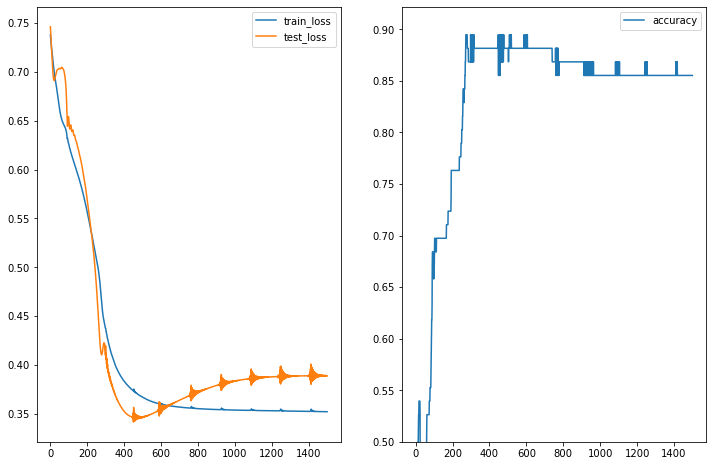

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

Accuracy of the test set reduced as the number of epochs increased beyond ~600.

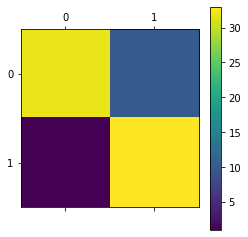

In [50]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

_, pred = result_5_tanh['_, pred']
y_pred = pred.detach().numpy()
y_test = result_5_tanh['actual_test_label'].detach().numpy()
results = confusion_matrix(y_test, y_pred)

plt.matshow(results)

plt.colorbar()
plt.show()

In [51]:
recall_score(y_test, y_pred,average = 'weighted')

0.8552631578947368

In [52]:
precision_score(y_test, y_pred,average = 'weighted')

0.8792144208300879